# Chapter 3: A Deep Dive into Matplotlib

## Visualizing stock trends.

Trong hoạt động này, chúng ta sẽ tạo một biểu đồ đường để thể hiện xu hướng chứng khoán. 

Giả sử bạn đang có hứng thú đầu tư cổ phiếu. Bạn có được dữ liệu về giá cổ phiếu của “năm ông lớn”: Amazon, Google, Apple, Facebook và Microsoft.

In [1]:
# Import statements
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

Sử dụng Pandas để đọc dữ liệu nằm trong thư mục con.

In [2]:
# load datasets
google = pd.read_csv('./data/GOOGL_data.csv')
facebook = pd.read_csv('./data/FB_data.csv')
apple = pd.read_csv('./data/AAPL_data.csv')
amazon = pd.read_csv('./data/AMZN_data.csv')
microsoft = pd.read_csv('./data/MSFT_data.csv')

Use Matplotlib to create a line chart visualizing the closing prices for the past five years (whole data sequence) for all five companies. Add labels, titles, and a legend to make the visualization self-explanatory. Use plt.grid() to add a grid to your plot.

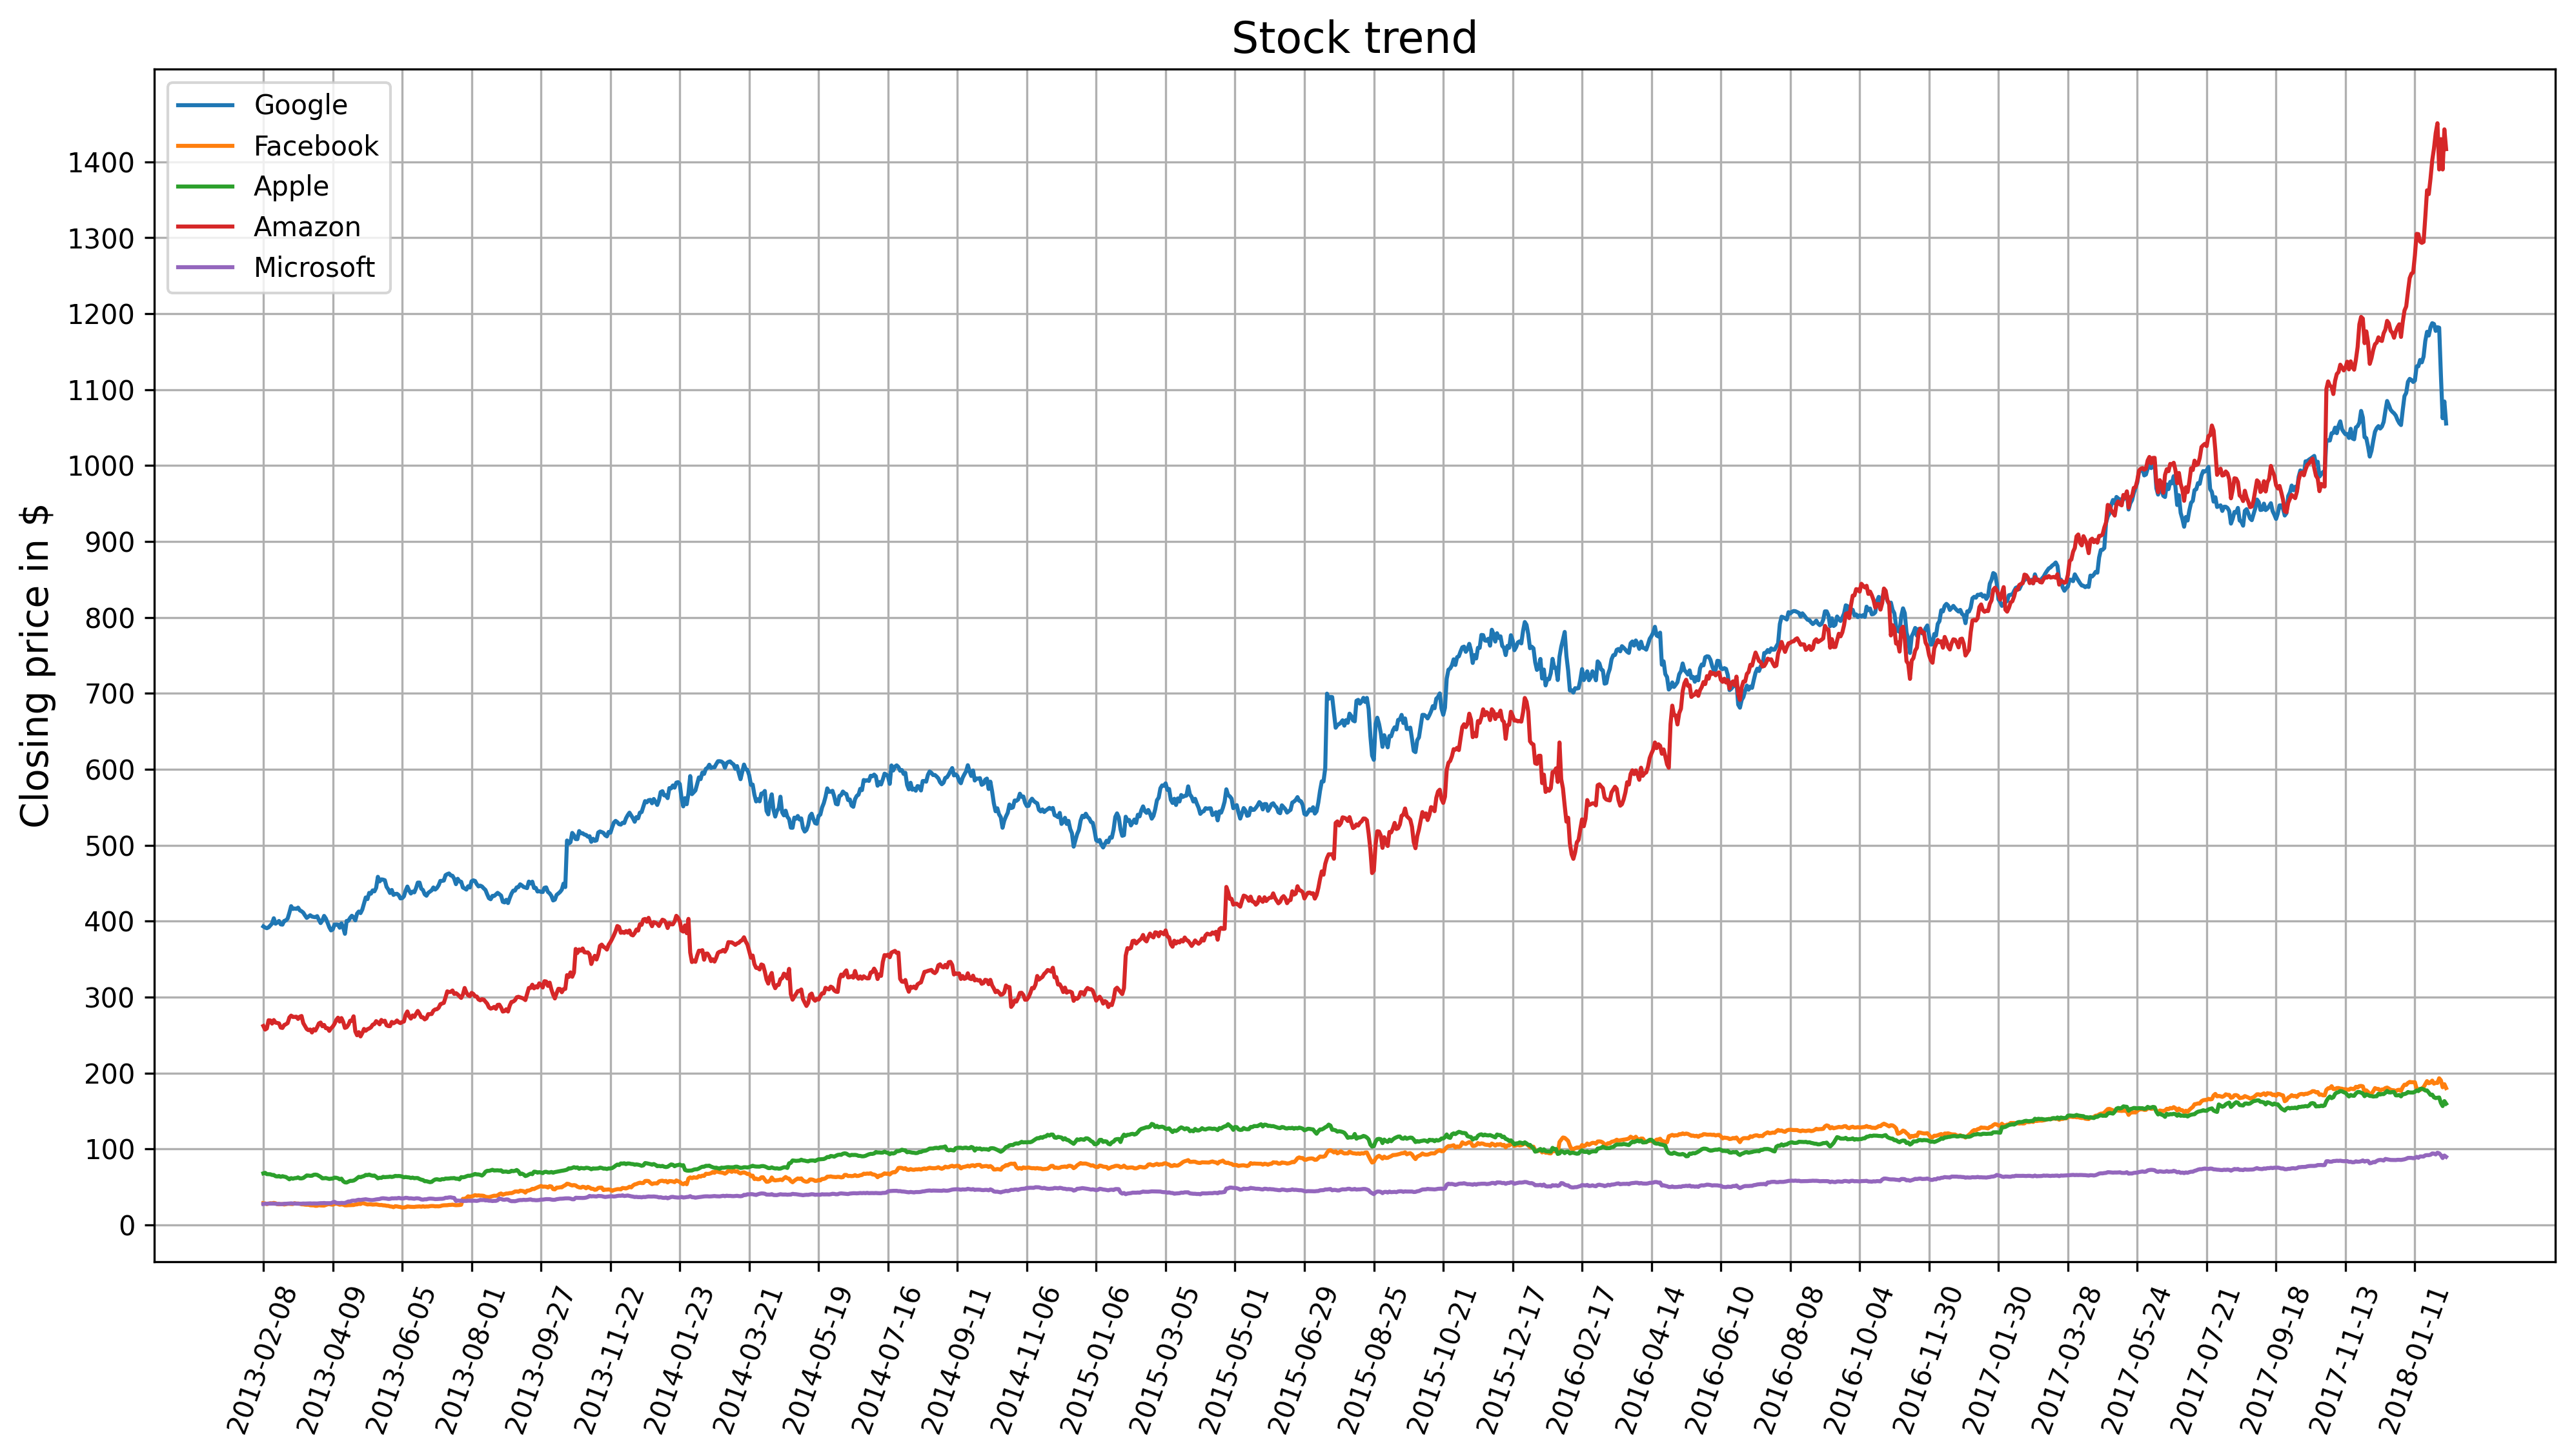

In [3]:
# Create figure
plt.figure(figsize=(16, 8), dpi=300)
# Plot data
plt.plot('date', 'close', data=google, label='Google')
plt.plot('date', 'close', data=facebook, label='Facebook')
plt.plot('date', 'close', data=apple, label='Apple')
plt.plot('date', 'close', data=amazon, label='Amazon')
plt.plot('date', 'close', data=microsoft, label='Microsoft')
# Specify ticks for x- and y-axis
plt.xticks(np.arange(0, 1260, 40), rotation=70)
plt.yticks(np.arange(0, 1450, 100))
# Add title and label for y-axis
plt.title('Stock trend', fontsize=16)
plt.ylabel('Closing price in $', fontsize=14)
# Add grid
plt.grid()
# Add legend
plt.legend()
# Show plot
plt.show()

------

## Movie comparison.

In this activity, we will use a bar plot to compare movie scores. You are given five movies with scores from Rotten Tomatoes. The Tomatometer is the percentage of approved Tomatometer critics who have given a positive review for the movie. The Audience Score is the percentage of users who have given a score of 3.5 or higher out of 5. Compare these two scores among the five movies.

In [4]:
# Import statements
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

%matplotlib inline

Use pandas to read the data located in the subfolder data.

In [5]:
# Load dataset
movie_scores = pd.read_csv('./data/movie_scores.csv')

Use Matplotlib to create a visually-appealing bar plot comparing the two scores for all five movies.
Use the movie titles as labels for the x-axis. Use percentages in an interval of 20 for the y-axis and minor ticks in interval of 5. Add a legend and a suitable title to the plot.

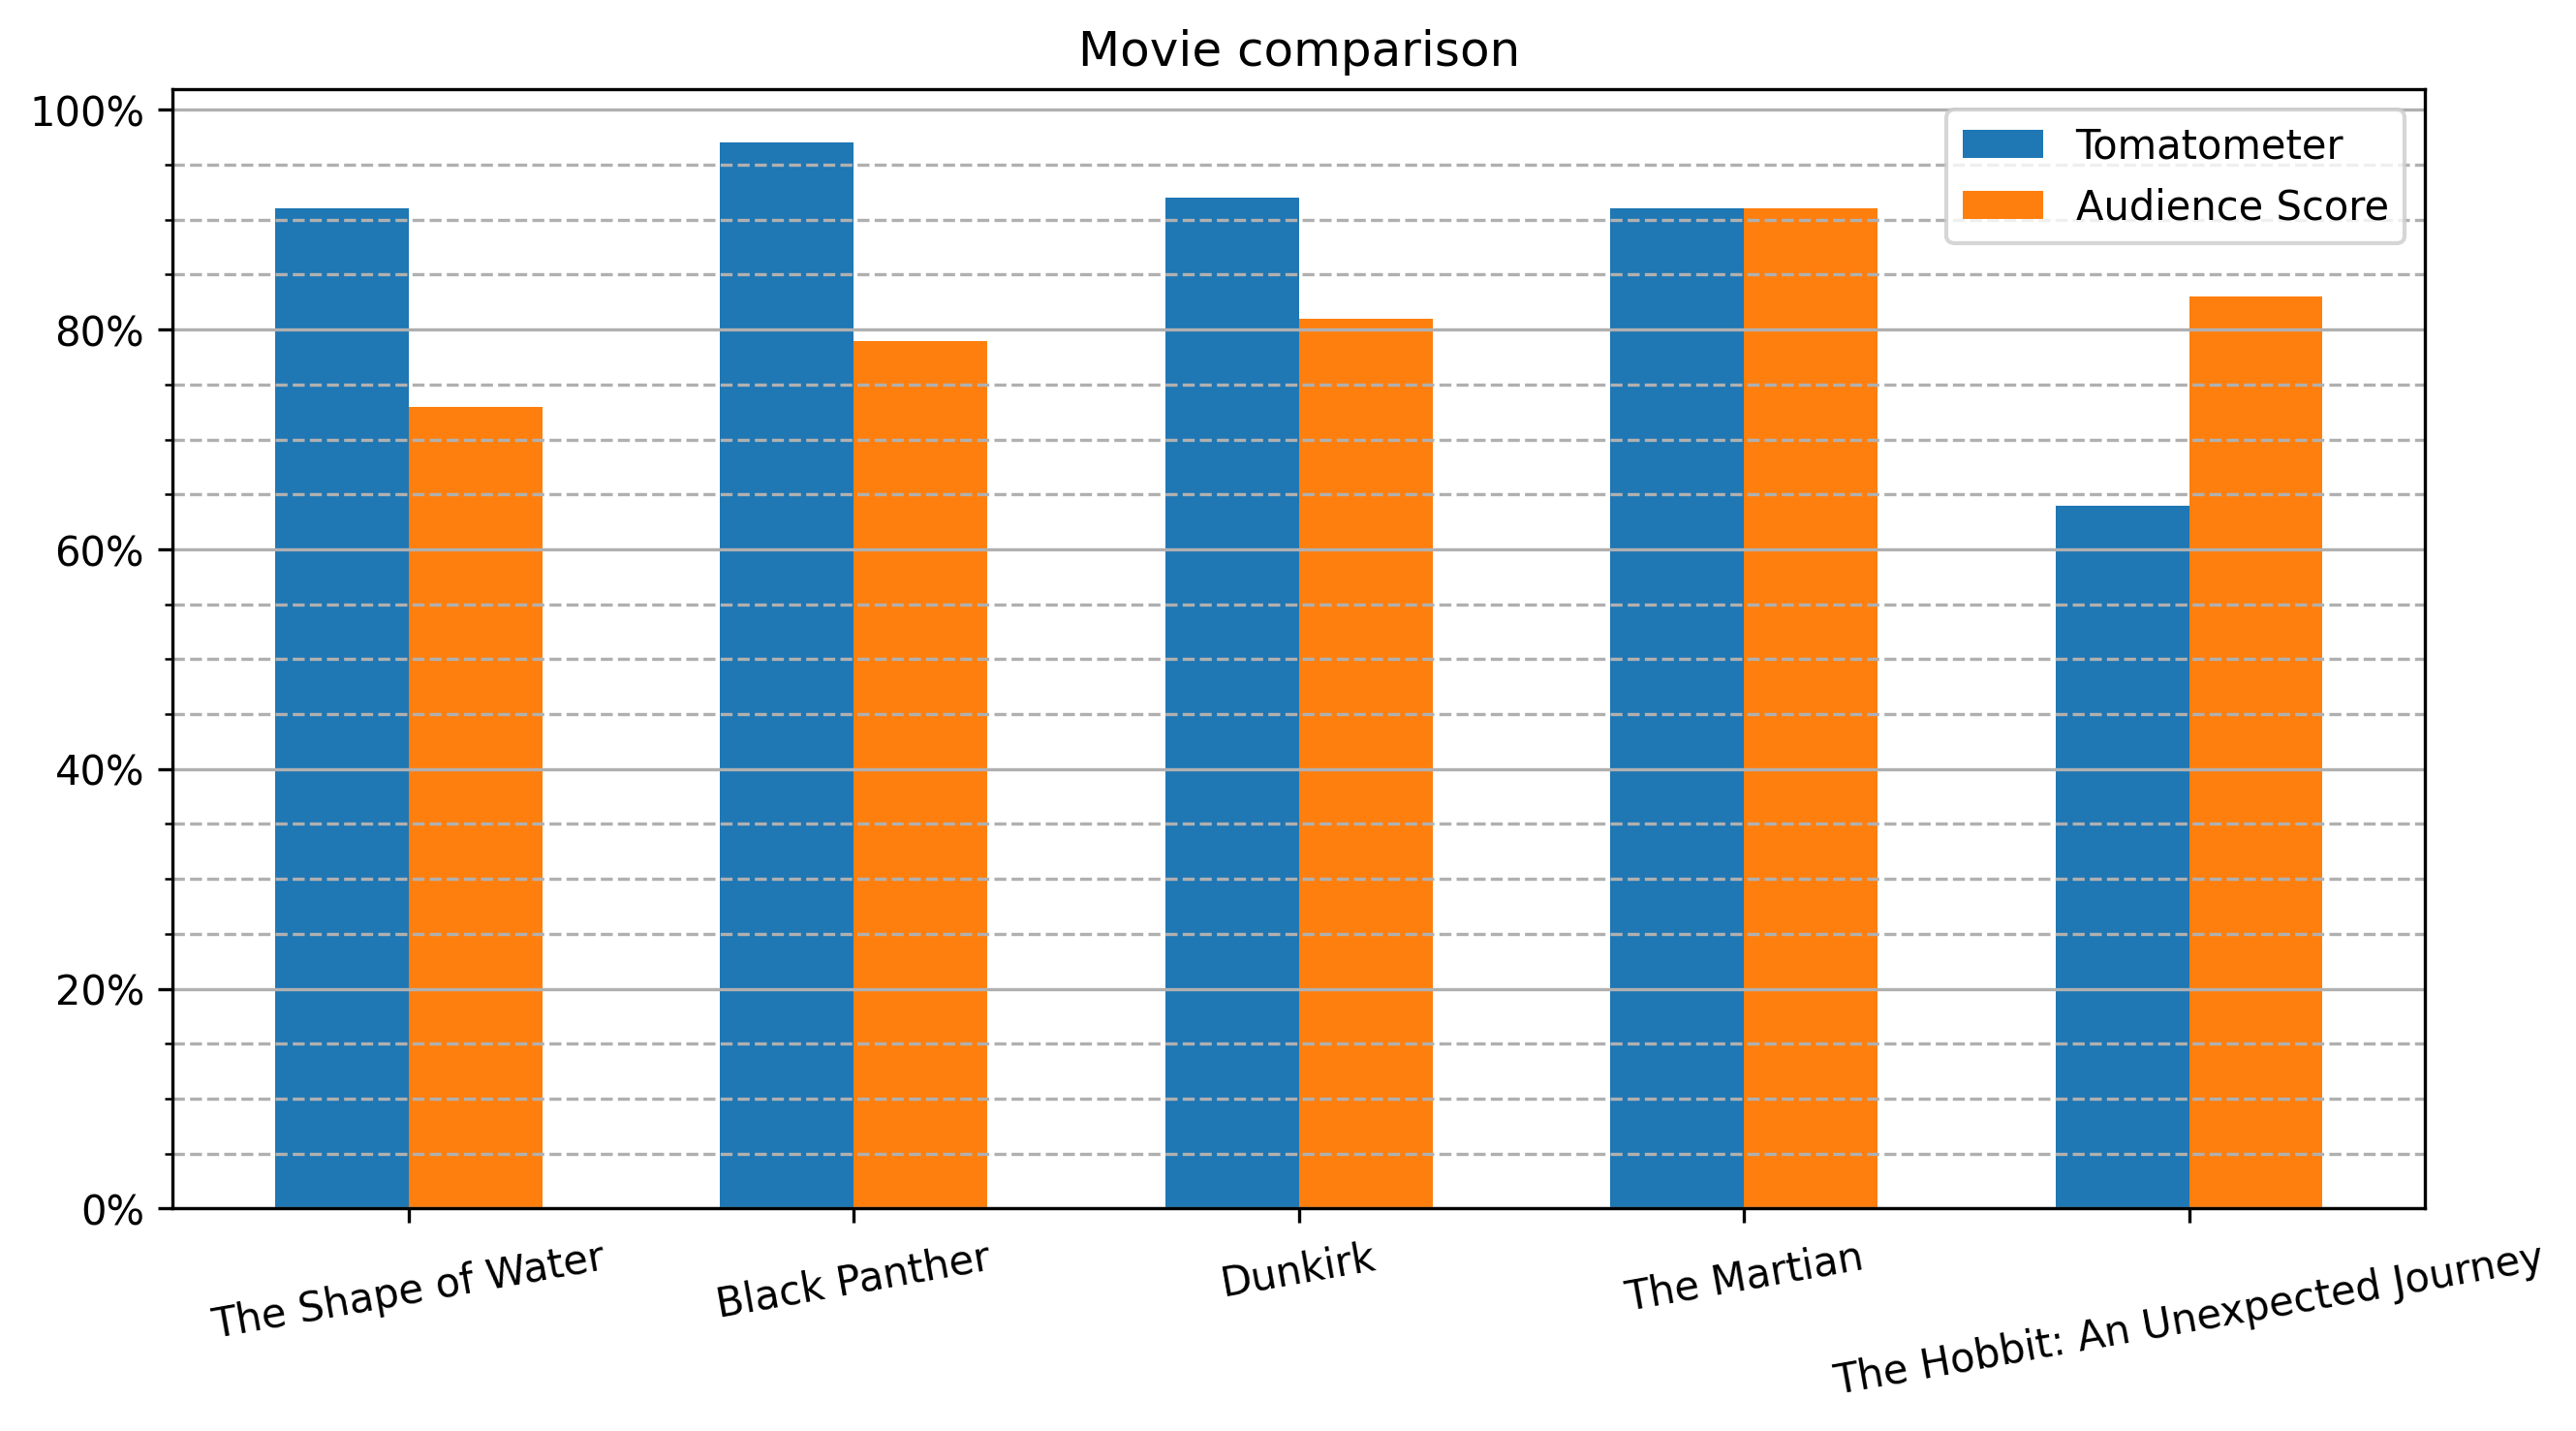

In [6]:
# Create figure
plt.figure(figsize=(10, 5), dpi=300)
# Create bar plot
pos = np.arange(len(movie_scores['MovieTitle']))
width = 0.3
plt.bar(pos - width / 2, movie_scores['Tomatometer'], width, label='Tomatometer')
plt.bar(pos + width / 2, movie_scores['AudienceScore'], width, label='Audience Score')
# Specify ticks
plt.xticks(pos, rotation=10)
plt.yticks(np.arange(0, 101, 20))
# Get current Axes for setting tick labels and horizontal grid
ax = plt.gca()
# Set tick labels
ax.set_xticklabels(movie_scores['MovieTitle'])
ax.set_yticklabels(['0%', '20%', '40%', '60%', '80%', '100%'])
# Add minor ticks for y-axis in the interval of 5
ax.set_yticks(np.arange(0, 100, 5), minor=True)
# Add major horizontal grid with solid lines
ax.yaxis.grid(which='major')
# Add minor horizontal grid with dashed lines
ax.yaxis.grid(which='minor', linestyle='--')
# Add title
plt.title('Movie comparison')
# Add legend
plt.legend()
# Show plot
plt.show()

------

## Restaurant performance

In this activity, we will use a stacked bar plot to visualize the performance of a restaurant. Let’s look at the following scenario: You are the owner of a restaurant and due to a new law you have to introduce a smoking free day. To make as few losses as possible you want to visualize how much sales are made every day according to smoking and non-smoking people.

In [7]:
# Import statements
import pandas as sb
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [8]:
# Load dataset
bills = sns.load_dataset('tips')

Use the given dataset and create a matrix where the elements contain the sum of the total bills for each day and smoking/non-smoking person.

In [9]:
days = ['Thur', 'Fri', 'Sat', 'Sun']
days_range = np.arange(len(days))
smoker = ['Yes', 'No']

bills_by_days = [bills[bills['day'] == day] for day in days]
bills_by_days_smoker = [[bills_by_days[day][bills_by_days[day]['smoker'] == s] for s in smoker] for day in days_range]
total_by_days_smoker = [[bills_by_days_smoker[day][s]['total_bill'].sum() for s in range(len(smoker))] for day in days_range]
totals = np.asarray(total_by_days_smoker)

Create a stacked bar plot, stacking the summed smoking and non-smoking total bills separated for each day. Add a legend, labels, and a title.

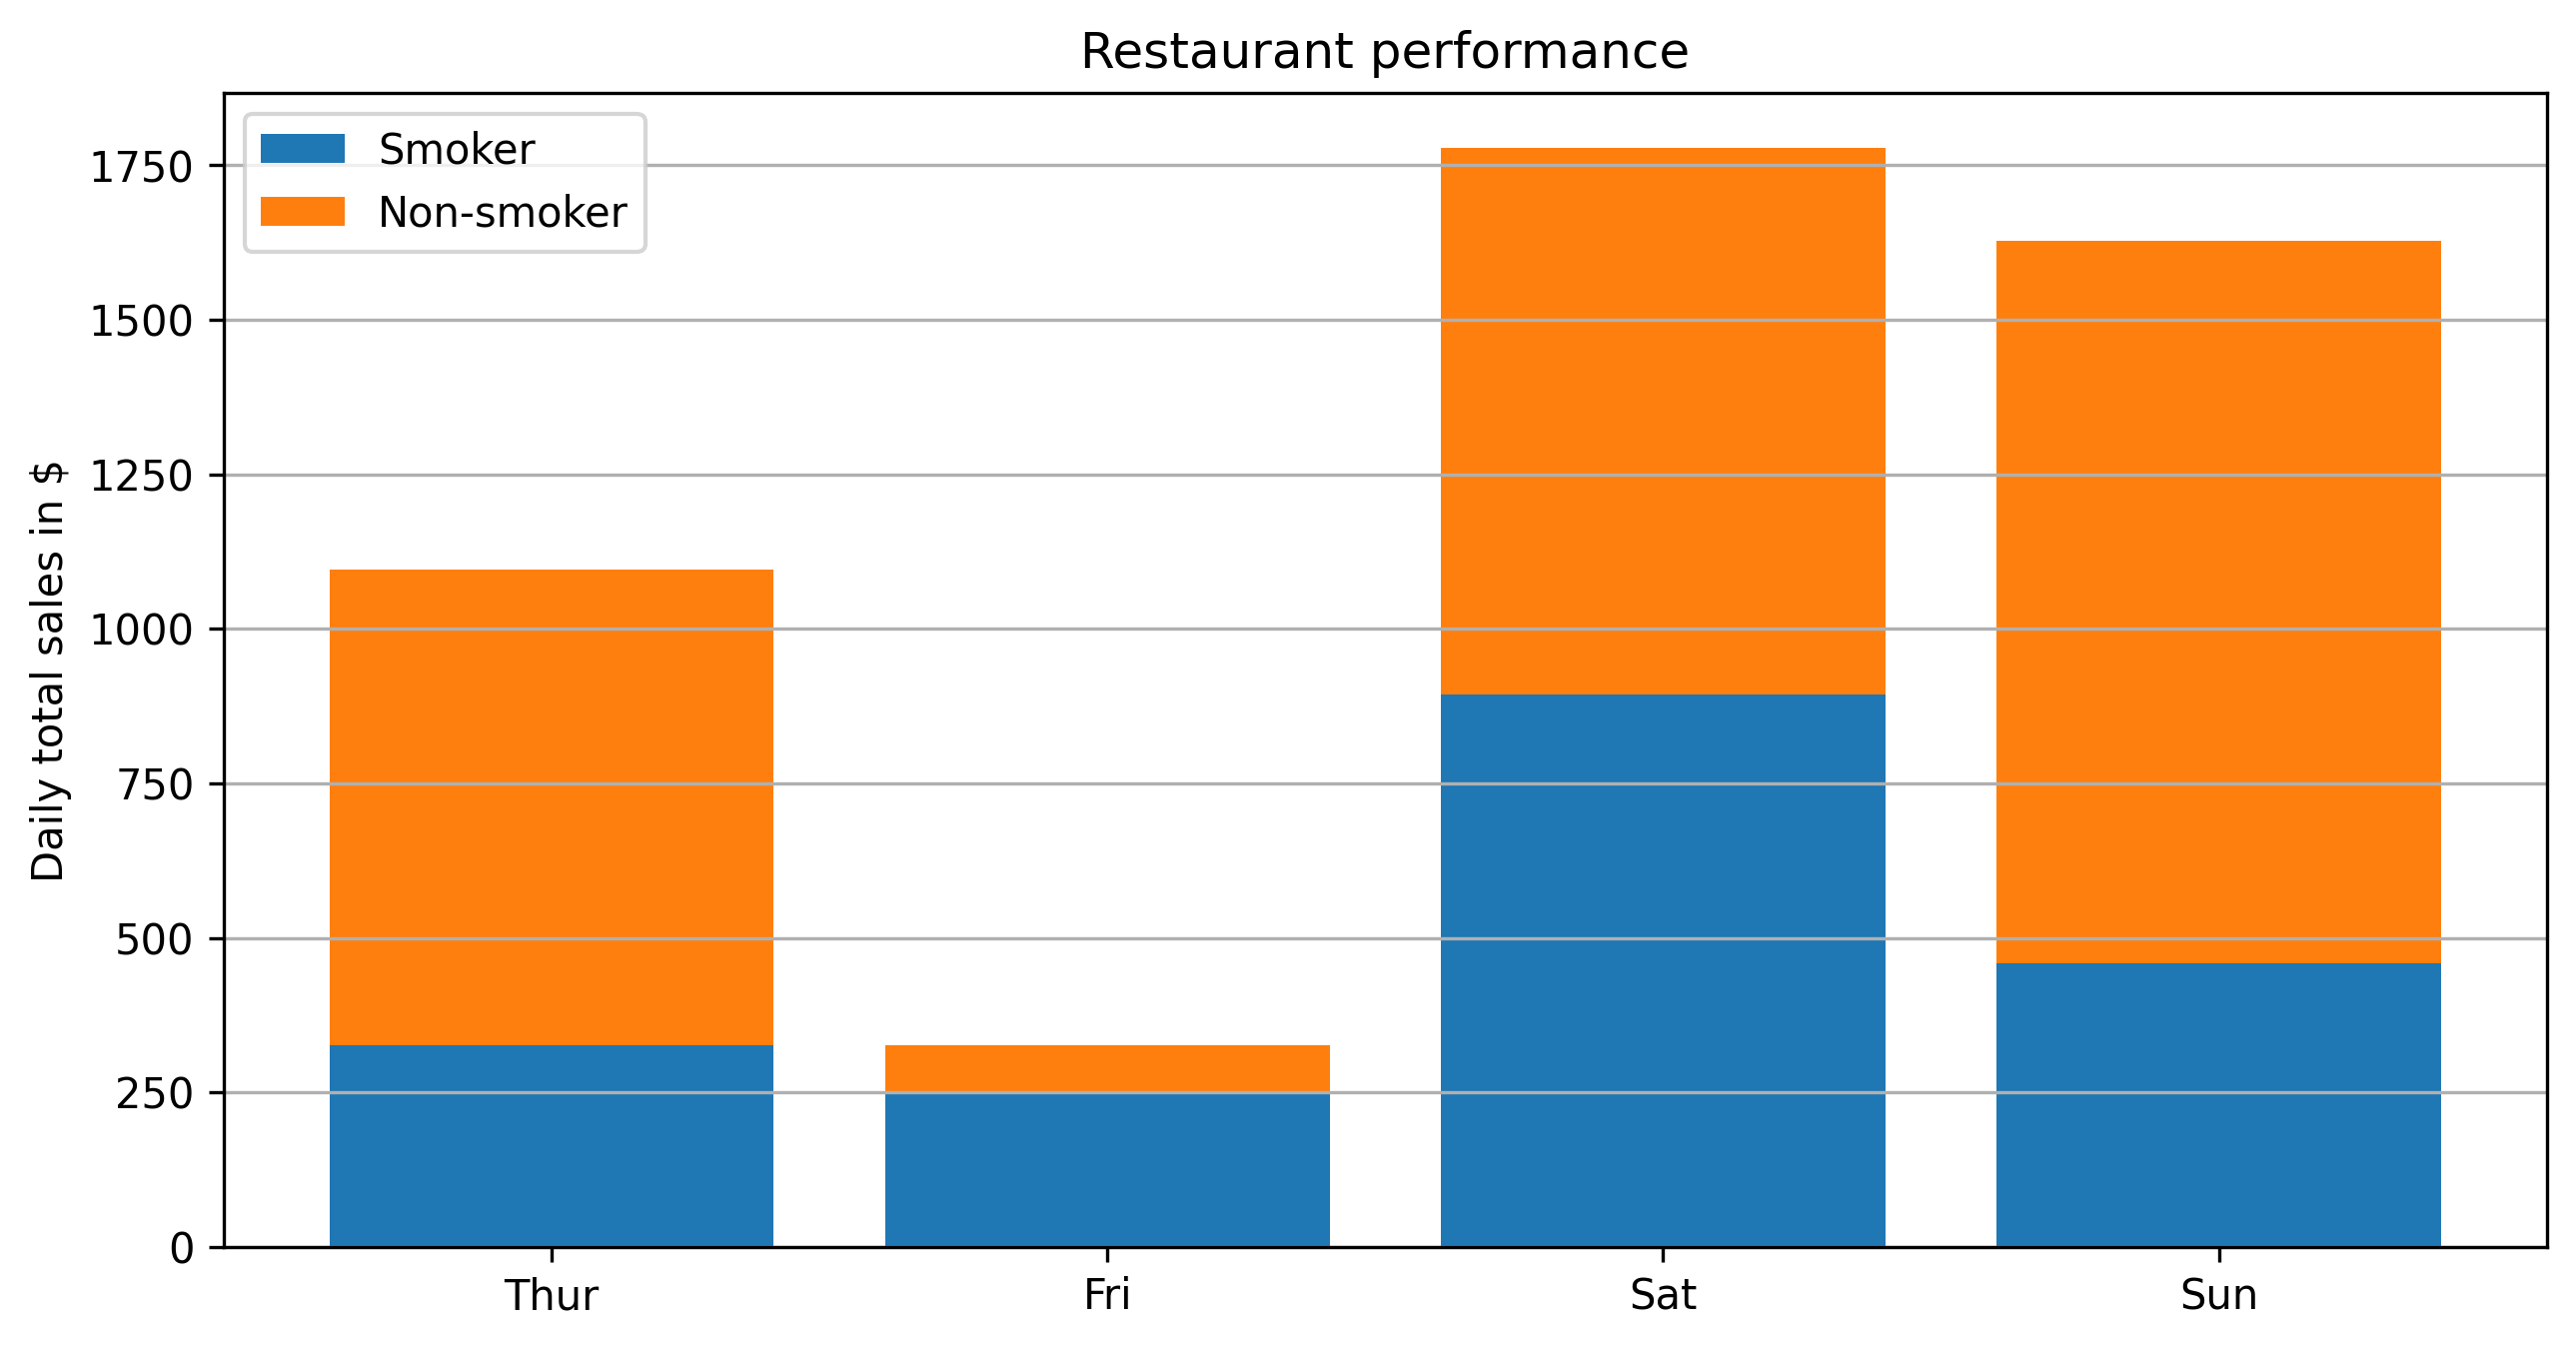

In [10]:
# Create figure
plt.figure(figsize=(10, 5), dpi=300)
# Create stacked bar plot
plt.bar(days_range, totals[:, 0], label='Smoker')
plt.bar(days_range, totals[:, 1], bottom=totals[:, 0], label='Non-smoker')
# Add legend
plt.legend()
# Add labels and title
plt.xticks(days_range)
ax = plt.gca()
ax.set_xticklabels(days)
ax.yaxis.grid()
plt.ylabel('Daily total sales in $')
plt.title('Restaurant performance')
# Show plot
plt.show()

------------

## Smartphone sales units

In this activity, we will compare smartphone sales units using a stacked area chart. Let’s look at the following scenario: You want to invest in one of the biggest five smartphone manufacturers. Looking at the quarterly sales units as part of a whole may be a good indicator to invest in one of the companies.

In [11]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Use pandas to read the data located in the subfolder data.

In [12]:
# Load dataset
sales = pd.read_csv('./data/smartphone_sales.csv')

Create a visually-appealing stacked area chart. Add a legend, labels, and a title.

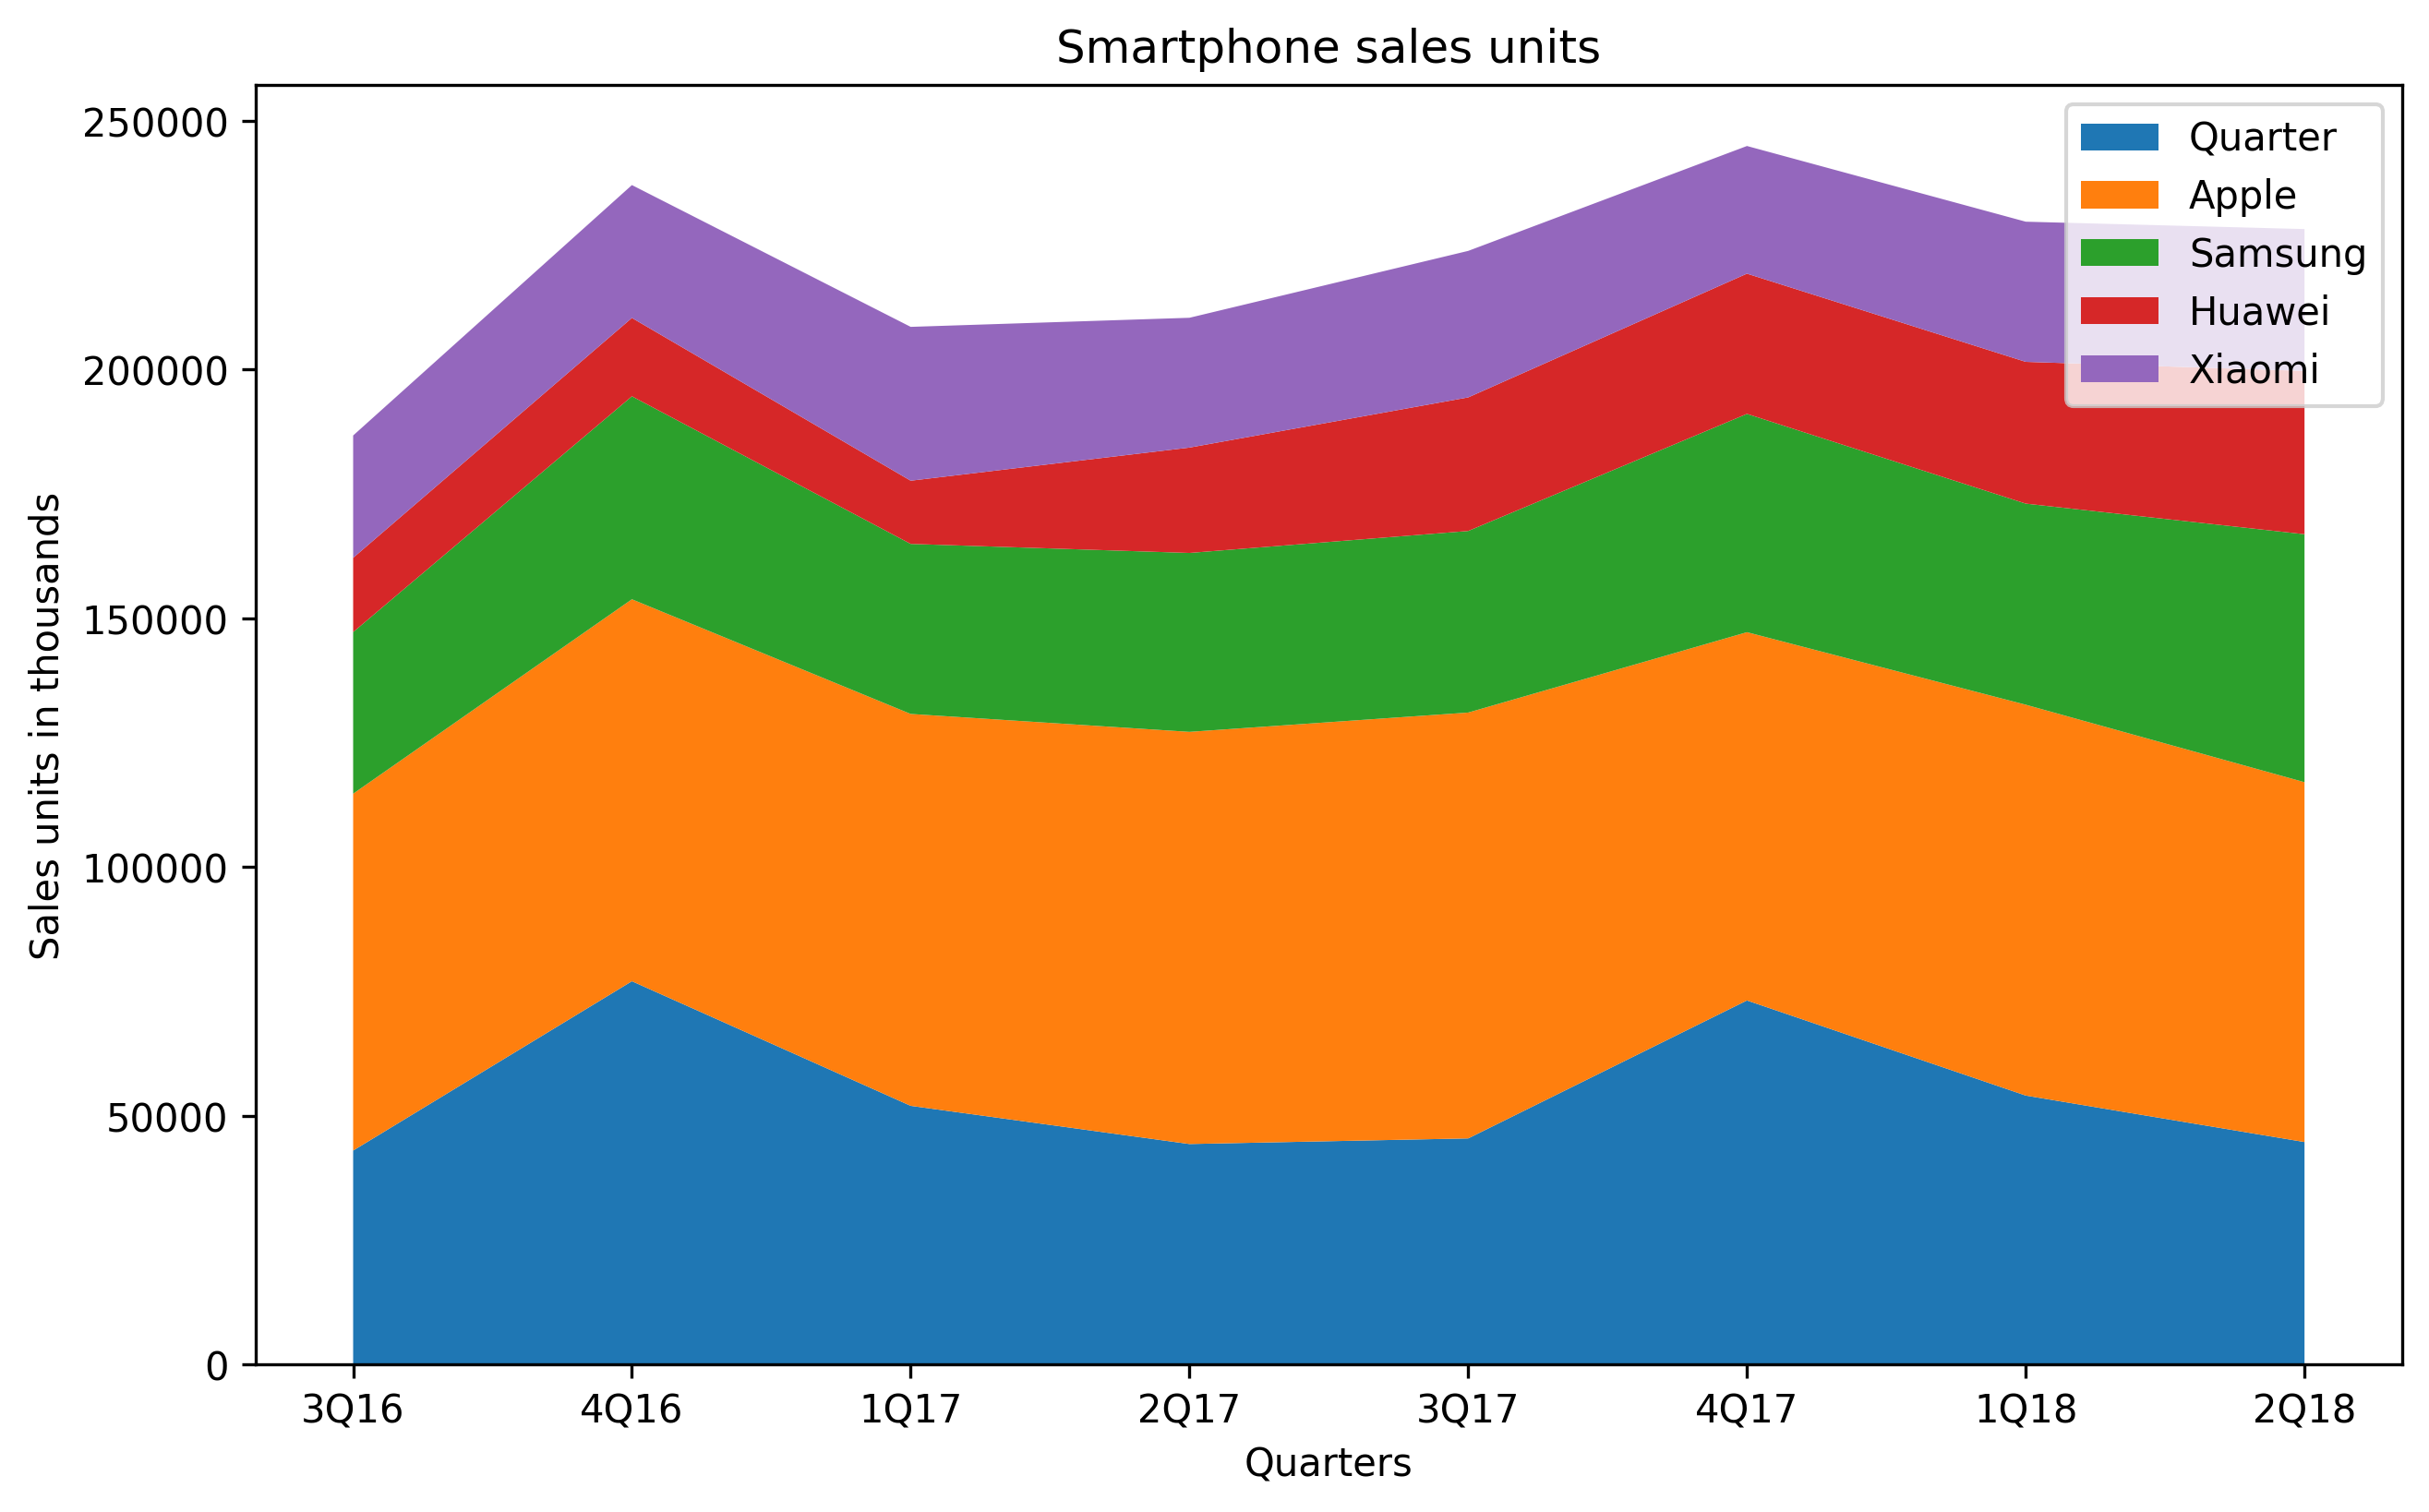

In [13]:
# Create figure
plt.figure(figsize=(10, 6), dpi=300)
# Create stacked area chart
labels = sales.columns[1:]
plt.stackplot('Quarter', 'Apple', 'Samsung', 'Huawei', 'Xiaomi', 'OPPO', data=sales, labels=labels)
# Add legend
plt.legend()
# Add labels and title
plt.xlabel('Quarters')
plt.ylabel('Sales units in thousands')
plt.title('Smartphone sales units')
# Show plot
plt.show()

-----

## Intelligent quotient

In this activity, we will visualize the intelligent quotient (IQ) using a histogram and box plots.

In [14]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
# IQ samples
iq_scores = [126,  89,  90, 101, 102,  74,  93, 101,  66, 120, 108,  97,  98,
            105, 119,  92, 113,  81, 104, 108,  83, 102, 105, 111, 102, 107,
            103,  89,  89, 110,  71, 110, 120,  85, 111,  83, 122, 120, 102,
            84, 118, 100, 100, 114,  81, 109,  69,  97,  95, 106, 116, 109,
            114,  98,  90,  92,  98,  91,  81,  85,  86, 102,  93, 112,  76,
            89, 110,  75, 100,  90,  96,  94, 107, 108,  95,  96,  96, 114,
            93,  95, 117, 141, 115,  95,  86, 100, 121, 103,  66,  99,  96,
            111, 110, 105, 110,  91, 112, 102, 112,  75]

Plot a histogram with ten bins for the given IQ scores. IQ scores are normally distributed with a mean of 100 and a standard deviation of 15. Visualize the mean as a vertical solid red line, and the standard deviation using dashed vertical lines. Add labels and a title.

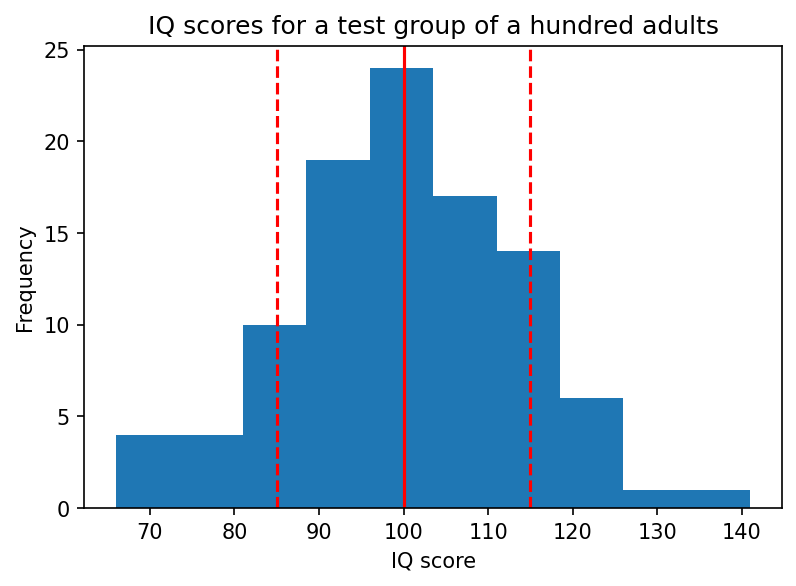

In [16]:
# Create figure
plt.figure(figsize=(6, 4), dpi=150)
# Create histogram
plt.hist(iq_scores, bins=10)
plt.axvline(x=100, color='r')
plt.axvline(x=115, color='r', linestyle= '--')
plt.axvline(x=85, color='r', linestyle= '--')
# Add labels and title
plt.xlabel('IQ score')
plt.ylabel('Frequency')
plt.title('IQ scores for a test group of a hundred adults')
# Show plot
plt.show()

Create a box plot to visualize the same IQ scores. Add labels and a title.

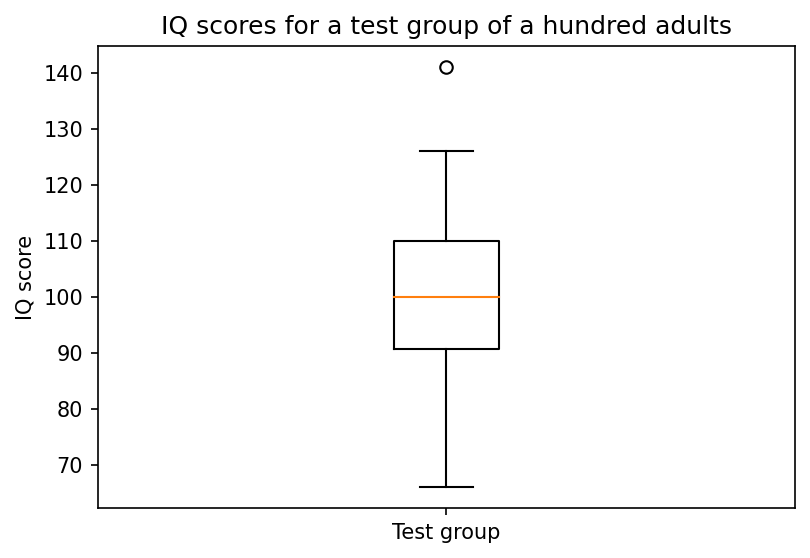

In [17]:
# Create figure
plt.figure(figsize=(6, 4), dpi=150)
# Create histogram
plt.boxplot(iq_scores)
# Add labels and title
ax = plt.gca()
ax.set_xticklabels(['Test group'])
plt.ylabel('IQ score')
plt.title('IQ scores for a test group of a hundred adults')
# Show plot
plt.show()

In [18]:
group_a = [118, 103, 125, 107, 111,  96, 104,  97,  96, 114,  96,  75, 114,
       107,  87, 117, 117, 114, 117, 112, 107, 133,  94,  91, 118, 110,
       117,  86, 143,  83, 106,  86,  98, 126, 109,  91, 112, 120, 108,
       111, 107,  98,  89, 113, 117,  81, 113, 112,  84, 115,  96,  93,
       128, 115, 138, 121,  87, 112, 110,  79, 100,  84, 115,  93, 108,
       130, 107, 106, 106, 101, 117,  93,  94, 103, 112,  98, 103,  70,
       139,  94, 110, 105, 122,  94,  94, 105, 129, 110, 112,  97, 109,
       121, 106, 118, 131,  88, 122, 125,  93,  78]
group_b = [126,  89,  90, 101, 102,  74,  93, 101,  66, 120, 108,  97,  98,
            105, 119,  92, 113,  81, 104, 108,  83, 102, 105, 111, 102, 107,
            103,  89,  89, 110,  71, 110, 120,  85, 111,  83, 122, 120, 102,
            84, 118, 100, 100, 114,  81, 109,  69,  97,  95, 106, 116, 109,
            114,  98,  90,  92,  98,  91,  81,  85,  86, 102,  93, 112,  76,
            89, 110,  75, 100,  90,  96,  94, 107, 108,  95,  96,  96, 114,
            93,  95, 117, 141, 115,  95,  86, 100, 121, 103,  66,  99,  96,
            111, 110, 105, 110,  91, 112, 102, 112,  75]
group_c = [108,  89, 114, 116, 126, 104, 113,  96,  69, 121, 109, 102, 107,
       122, 104, 107, 108, 137, 107, 116,  98, 132, 108, 114,  82,  93,
        89,  90,  86,  91,  99,  98,  83,  93, 114,  96,  95, 113, 103,
        81, 107,  85, 116,  85, 107, 125, 126, 123, 122, 124, 115, 114,
        93,  93, 114, 107, 107,  84, 131,  91, 108, 127, 112, 106, 115,
        82,  90, 117, 108, 115, 113, 108, 104, 103,  90, 110, 114,  92,
       101,  72, 109,  94, 122,  90, 102,  86, 119, 103, 110,  96,  90,
       110,  96,  69,  85, 102,  69,  96, 101,  90]
group_d = [ 93,  99,  91, 110,  80, 113, 111, 115,  98,  74,  96,  80,  83,
       102,  60,  91,  82,  90,  97, 101,  89,  89, 117,  91, 104, 104,
       102, 128, 106, 111,  79,  92,  97, 101, 106, 110,  93,  93, 106,
       108,  85,  83, 108,  94,  79,  87, 113, 112, 111, 111,  79, 116,
       104,  84, 116, 111, 103, 103, 112,  68,  54,  80,  86, 119,  81,
        84,  91,  96, 116, 125,  99,  58, 102,  77,  98, 100,  90, 106,
       109, 114, 102, 102, 112, 103,  98,  96,  85,  97, 110, 131,  92,
        79, 115, 122,  95, 105,  74,  85,  85,  95]

Create a box plot for each of the IQ scores of different test groups. Add labels and a title.

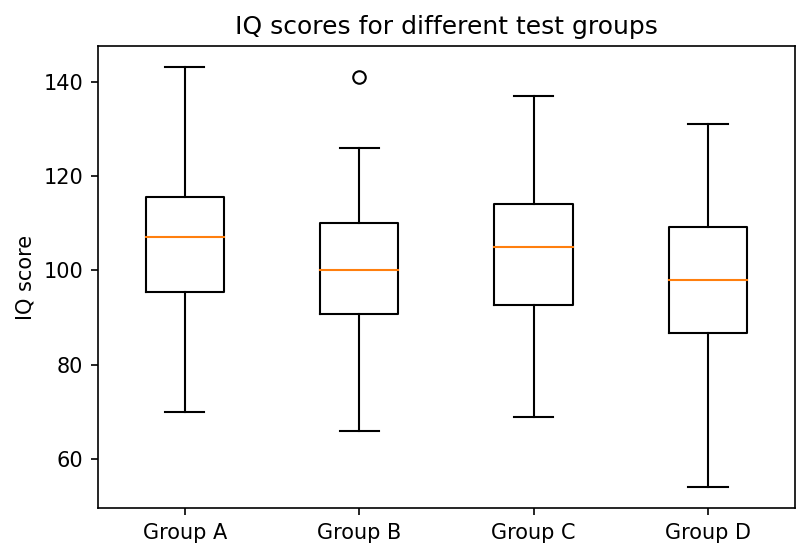

In [19]:
# Create figure
plt.figure(figsize=(6, 4), dpi=150)
# Create histogram
plt.boxplot([group_a, group_b, group_c, group_d])
# Add labels and title
ax = plt.gca()
ax.set_xticklabels(['Group A', 'Group B', 'Group C', 'Group D'])
plt.ylabel('IQ score')
plt.title('IQ scores for different test groups')
# Show plot
plt.show()

--------

## Animal statistics

In this activity, we will use a scatter plot to show correlation within a dataset. Let’s look at the following scenario: You are given a dataset containing information about various animals. Visualize correlation between animal attributes.

In [20]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
# Load dataset
data = pd.read_csv('./data/anage_data.csv')

The given dataset is not complete. Filter the data so you end up with samples containing a body mass and a maximum longevity. Sort the data according to the animal class.

In [22]:
# Preprocessing
longevity = 'Maximum longevity (yrs)'
mass = 'Body mass (g)'
data = data[np.isfinite(data[longevity]) & np.isfinite(data[mass])]
# Sort according to class
amphibia = data[data['Class'] == 'Amphibia']
aves = data[data['Class'] == 'Aves']
mammalia = data[data['Class'] == 'Mammalia']
reptilia = data[data['Class'] == 'Reptilia']

Create a scatter plot visualizing the correlation between the body mass and the maximum longevity. Use different colors for grouping data samples according to their class. Add a legend, labels and a title. Use a log scale for both the x-axis and y-axis.

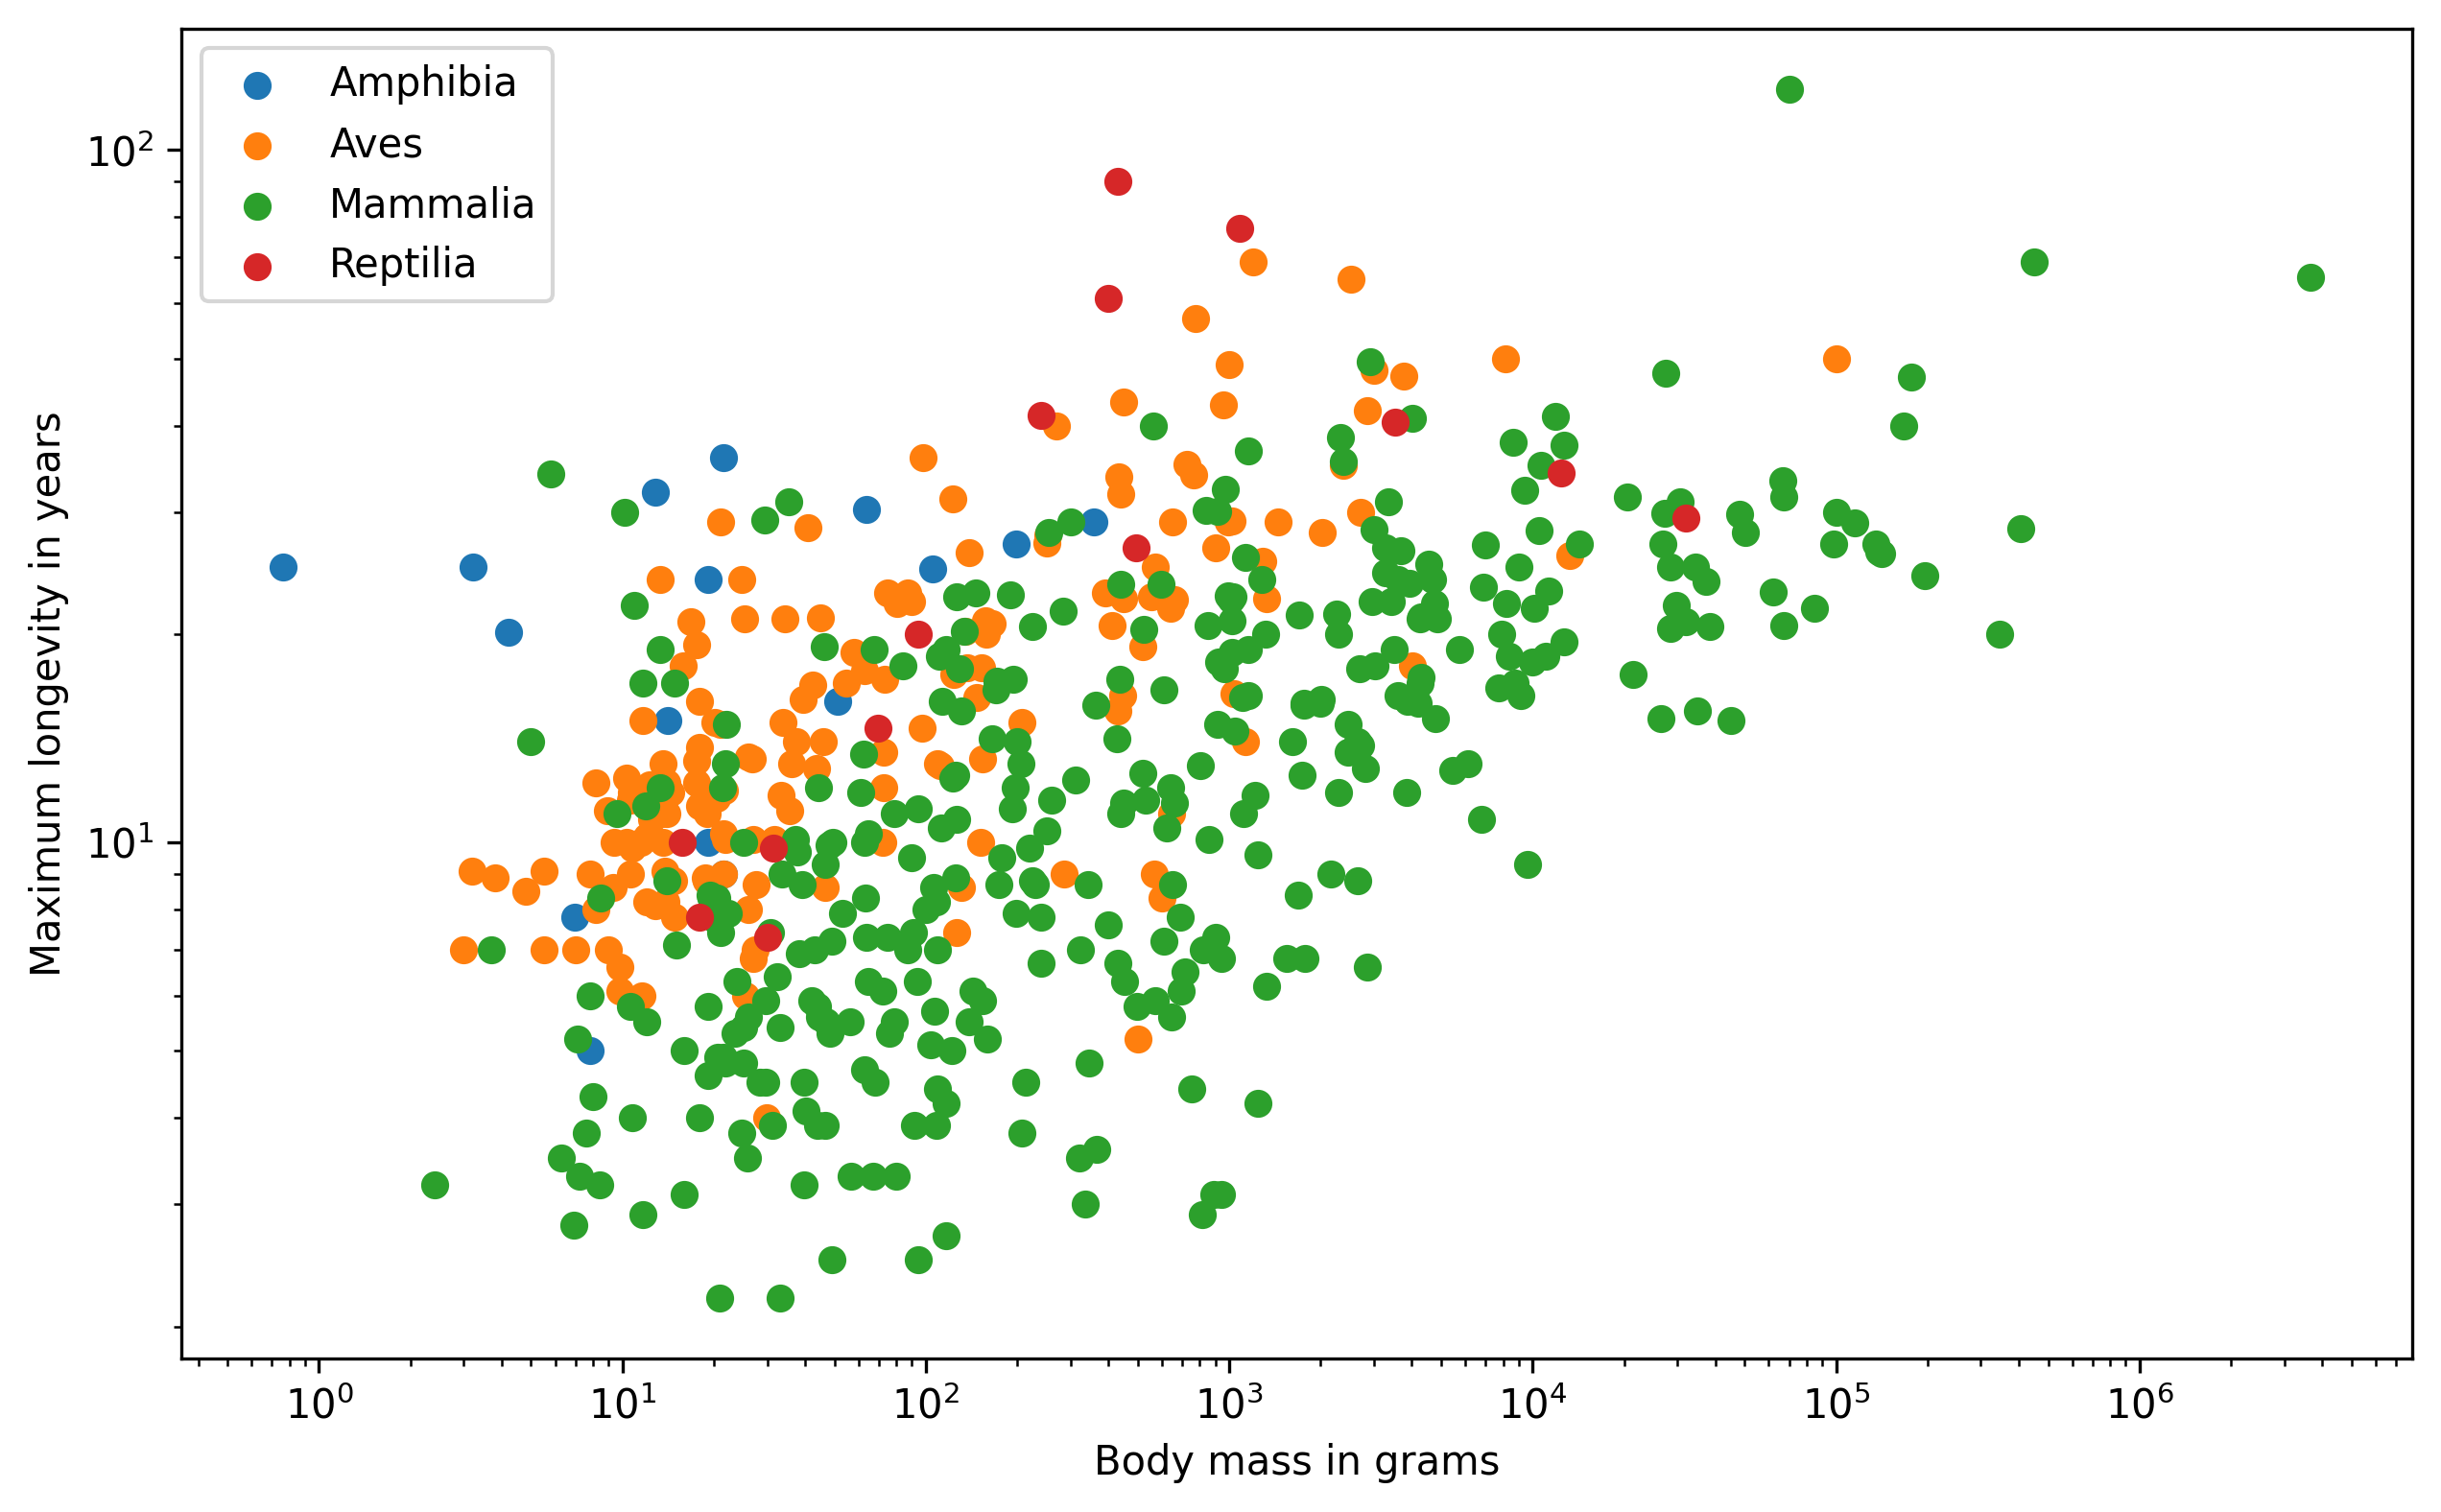

In [23]:
# Create figure
plt.figure(figsize=(10, 6), dpi=300)
# Create scatter plot
plt.scatter(amphibia[mass], amphibia[longevity], label='Amphibia')
plt.scatter(aves[mass], aves[longevity], label='Aves')
plt.scatter(mammalia[mass], mammalia[longevity], label='Mammalia')
plt.scatter(reptilia[mass], reptilia[longevity], label='Reptilia')
# Add legend
plt.legend()
# Log scale
ax = plt.gca()
ax.set_xscale('log')
ax.set_yscale('log')
# Add labels
plt.xlabel('Body mass in grams')
plt.ylabel('Maximum longevity in years')
# Show plot
plt.show()

---------------

## Scatter plot with marginal histograms

In this activity, we will make use of GridSpec to visualize a scatter plot with marginal histograms.

In [24]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [25]:
# Load dataset
data = pd.read_csv('./data/anage_data.csv')

The given dataset is not complete. Filter the data so you end up with samples containing a body mass and a maximum longevity. Select all samples of the class Aves and with a body mass smaller than 20,000.

In [26]:
# Preprocessing
longevity = 'Maximum longevity (yrs)'
mass = 'Body mass (g)'
data = data[np.isfinite(data[longevity]) & np.isfinite(data[mass])]
# Sort according to class
aves = data[data['Class'] == 'Aves']
aves = data[data[mass] < 20000]

Create a figure with constrained layout. Create a gridspec of size 4x4. Create a scatter plot of size 3x3 and marginal histograms of size 1x3 and 3x1. Add labels and a figure title.

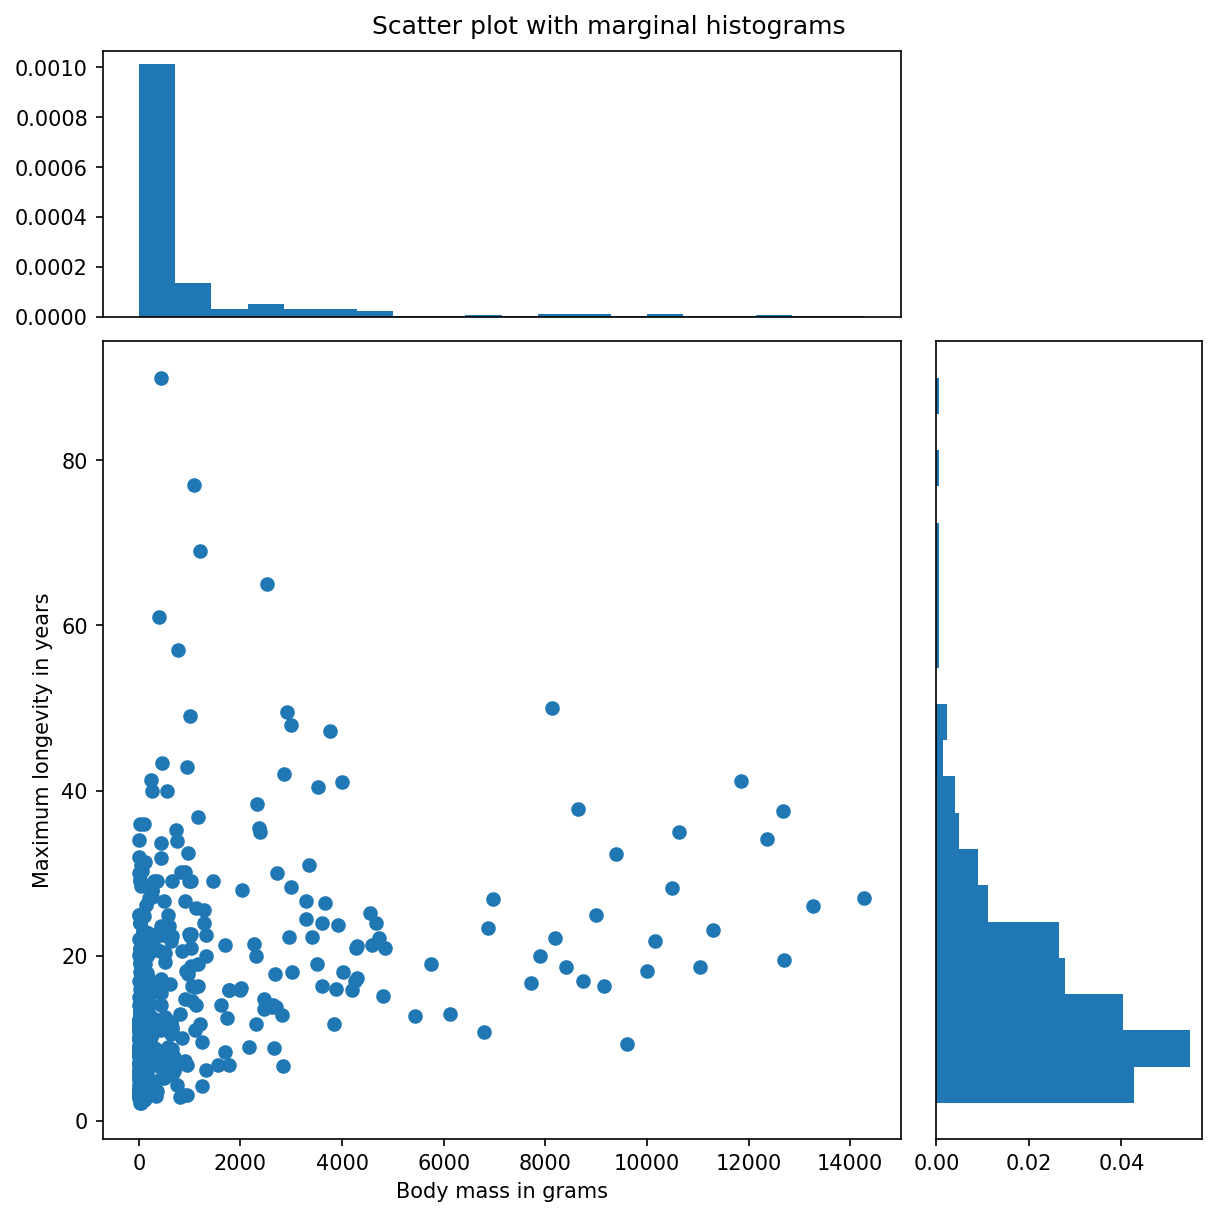

In [27]:
# Create figure
fig = plt.figure(figsize=(8, 8), dpi=150, constrained_layout=True)
# Create gridspec
gs = fig.add_gridspec(4, 4)
# Specify subplots
histx_ax = fig.add_subplot(gs[0, :-1])
histy_ax = fig.add_subplot(gs[1:, -1])
scatter_ax = fig.add_subplot(gs[1:, :-1])
# Create plots
scatter_ax.scatter(aves[mass], aves[longevity])
histx_ax.hist(aves[mass], bins=20, density=True)
histx_ax.set_xticks([])
histy_ax.hist(aves[longevity], bins=20, density=True, orientation='horizontal')
histy_ax.set_yticks([])
# Add labels and title
plt.xlabel('Body mass in grams')
plt.ylabel('Maximum longevity in years')
fig.suptitle('Scatter plot with marginal histograms')
# Show plot
plt.show()

----------

## Displaying multiple images

In this activity, we will plot images in a grid.

In [28]:
# Import statements
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

Load all four images from the subfolder data.

In [43]:
import matplotlib.image as mpimg
import IPython.display as display

image_paths = [
    './data/img/photo-1.jpg',
    './data/img/photo-2.jpg',
    './data/img/photo-3.jpg',
    './data/img/photo-4.jpg',
]

images = [mpimg.imread(image_path) for image_path in image_paths]


Visualize the images in a 2x2 grid. Remove the axes and give each image a label.

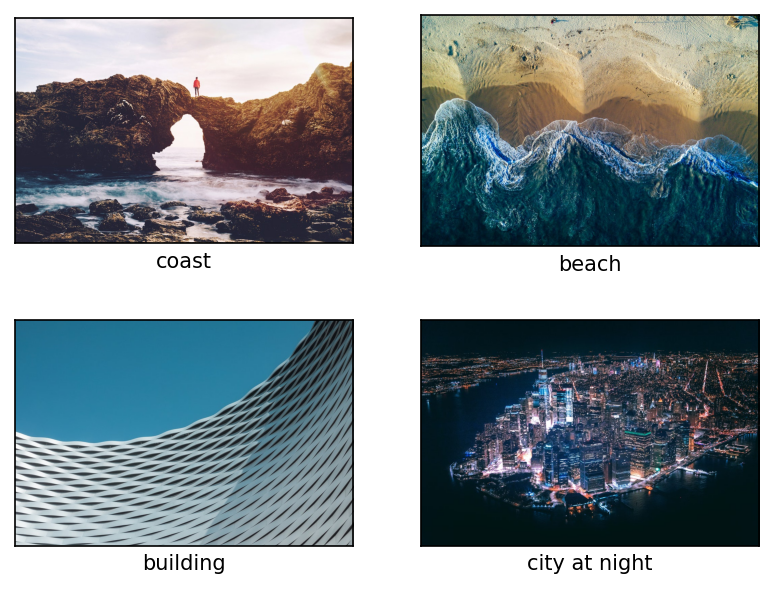

In [44]:
# Create subplot
fig, axes = plt.subplots(2, 2)
fig.figsize = (6, 6)
fig.dpi = 150
axes = axes.ravel()
# Specify labels
labels = ['coast', 'beach', 'building', 'city at night']
# Plot images
for i in range(len(images)):
    axes[i].imshow(images[i])
    axes[i].set_xticks([])
    axes[i].set_yticks([])
    axes[i].set_xlabel(labels[i])